# Problem Statement:
## Detect the three major attacking disease of rice plants

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Assuming some constants
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 100

In [3]:
# Loading the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "RiceLeaf",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
   
)

Found 119 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

(16, 256, 256, 3)
[2 1 0 1 2 2 1 1 1 1 1 2 1 1 1 2]


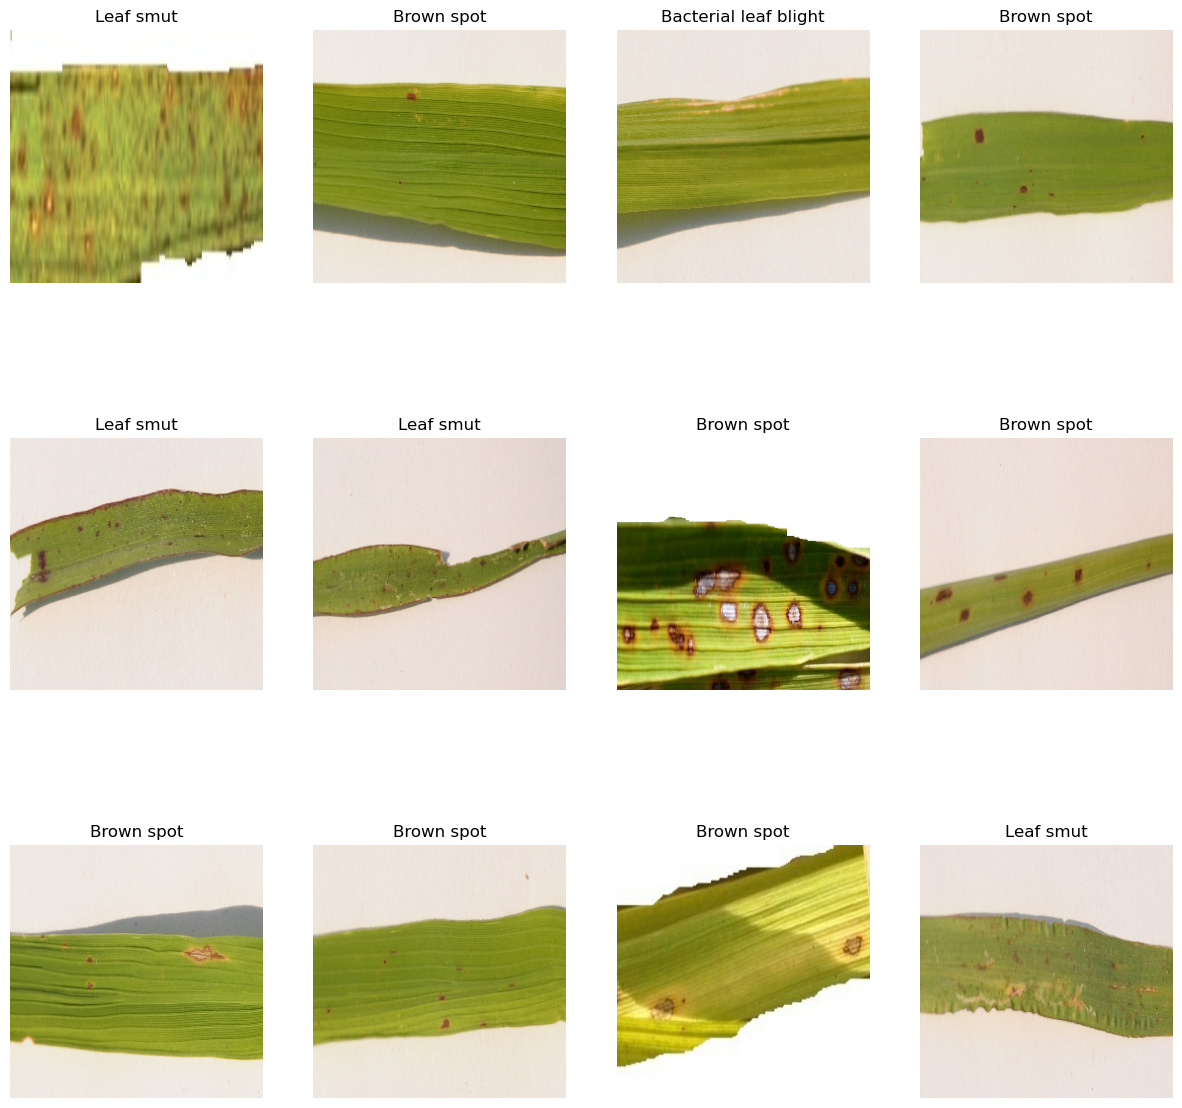

In [5]:
# Plotting the images 
plt.figure(figsize=(15,15))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

#### The images are resized to 256*256 and visualized as above.

In [6]:
# Splitting the dataset
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=1000):
    assert train_split + val_split + test_split == 1.0

    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=42)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
# Scaling the dataset using Keras layers
inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
x = layers.Rescaling(1./255)(inputs)

In [9]:
# Augmenting the dataset
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
# Data augmentation applied to the dataset
x = data_augmentation(x)

In [11]:
# Defining the layers of the model
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation='softmax')(x)  # 3 classes assumed so softmax is applied.

In [12]:
# Creating the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [13]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [27]:
# Model fitting
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/100
5/5 [==============================] - 4s 735ms/step - loss: 0.5743 - accuracy: 0.7324 - val_loss: 0.4299 - val_accuracy: 0.8750
Epoch 2/100
5/5 [==============================] - 3s 589ms/step - loss: 0.5399 - accuracy: 0.7746 - val_loss: 0.4633 - val_accuracy: 0.8125
Epoch 3/100
5/5 [==============================] - 4s 647ms/step - loss: 0.4665 - accuracy: 0.7887 - val_loss: 0.5618 - val_accuracy: 0.7500
Epoch 4/100
5/5 [==============================] - 3s 569ms/step - loss: 0.4463 - accuracy: 0.8028 - val_loss: 0.5939 - val_accuracy: 0.7500
Epoch 5/100
5/5 [==============================] - 3s 614ms/step - loss: 0.5216 - accuracy: 0.7887 - val_loss: 0.2836 - val_accuracy: 0.9375
Epoch 6/100
5/5 [==============================] - 3s 591ms/step - loss: 0.4681 - accuracy: 0.8169 - val_loss: 0.2914 - val_accuracy: 0.8571
Epoch 7/100
5/5 [==============================] - 3s 637ms/step - loss: 0.3963 - accuracy: 0.8592 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 8/100
5

In [28]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 1s 173ms/step - loss: 0.2951 - accuracy: 0.9375
Test Accuracy: 93.75%


In [16]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 5}

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
history.history['accuracy']

[0.3125,
 0.3499999940395355,
 0.3499999940395355,
 0.375,
 0.28169015049934387,
 0.4225352108478546,
 0.5070422291755676,
 0.5633803009986877,
 0.577464759349823,
 0.5070422291755676,
 0.49295774102211,
 0.6056337952613831,
 0.6478873491287231,
 0.5211267471313477,
 0.6000000238418579,
 0.7124999761581421,
 0.6056337952613831,
 0.6625000238418579,
 0.6478873491287231,
 0.6478873491287231,
 0.6338028311729431,
 0.7323943376541138,
 0.675000011920929,
 0.7746478915214539,
 0.7464788556098938,
 0.7183098793029785,
 0.762499988079071,
 0.75,
 0.7605633735656738,
 0.7323943376541138,
 0.7464788556098938,
 0.7042253613471985,
 0.6760563254356384,
 0.6901408433914185,
 0.7042253613471985,
 0.7323943376541138,
 0.7605633735656738,
 0.7464788556098938,
 0.6760563254356384,
 0.7323943376541138,
 0.7183098793029785,
 0.7875000238418579,
 0.7124999761581421,
 0.7250000238418579,
 0.7464788556098938,
 0.7746478915214539,
 0.7749999761581421,
 0.800000011920929,
 0.8309859037399292,
 0.762499988079

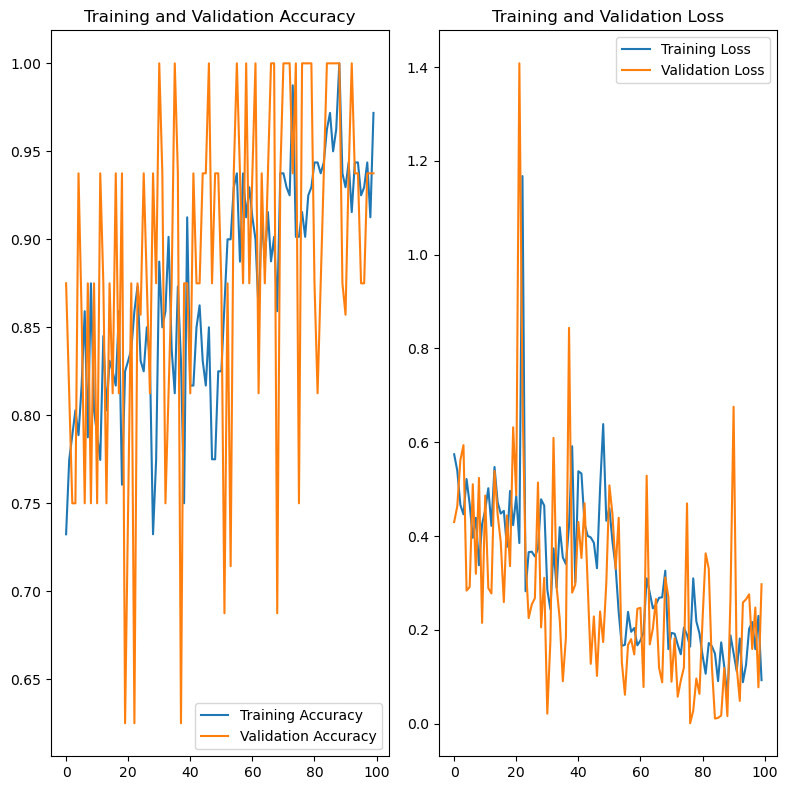

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

## Insights from the above accuracy and loss graphs

#### - After running 100 epochs, we can see that the training accuracy remained above 50% with fewer fluctuations up to 45 epochs and rose exponentially to more than 95%. In contrast, the validation accuracy fluctuated more and ended at about 95% in the last 100th epoch.
#### - The training loss and validation loss both started to decrease as the epochs started to increase and ended at 0.2.
#### - The actual model test accuracy as per the 100 epochs is found to be 94% but while using 50 epochs the accuracy roamed around 75%.

First image to predict
Actual Label: Bacterial leaf blight
1/1 [==============================] - 0s 240ms/step
Predicted Label: Bacterial leaf blight


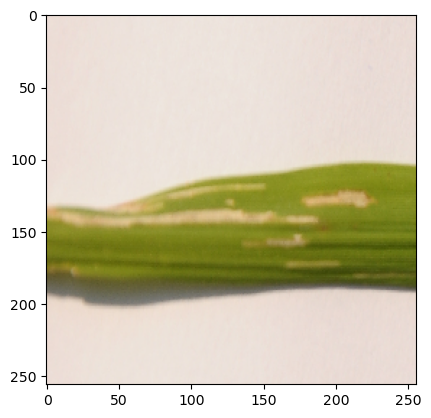

In [21]:
# Predicting for first image
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

#### - The above actual label and prediction label are the same.
#### - While running the code every different time, the prediction is accurate. Every time the kernel restarts, new test image arises and the predicted and actual labels are similar. 

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Creating a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


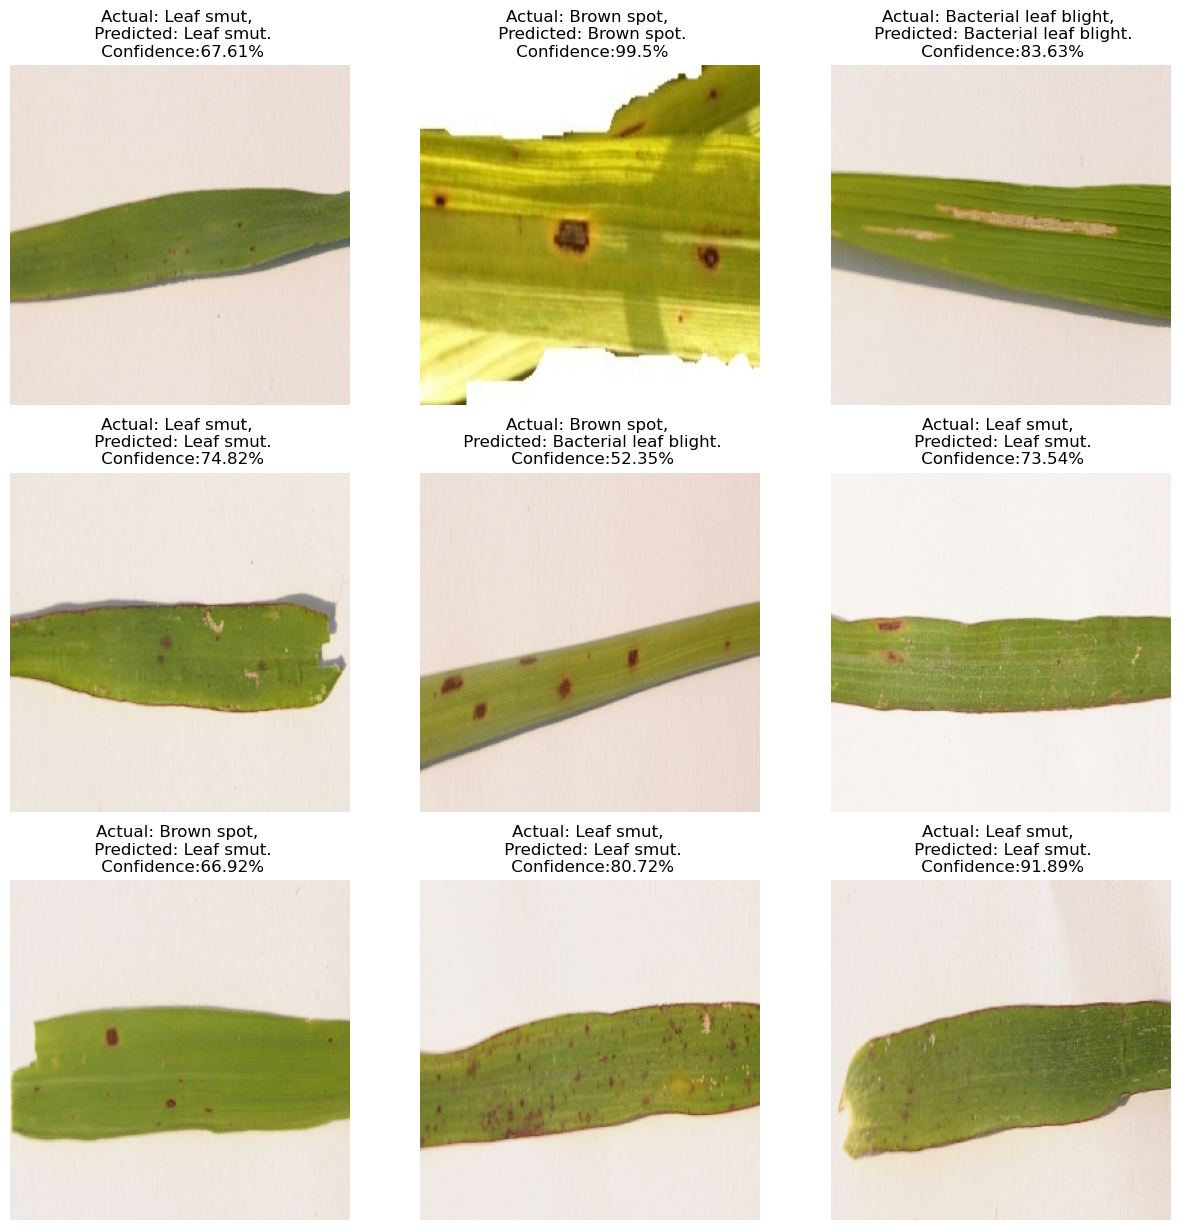

In [23]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

#### The above figure shows the confidence of the model prediction.

In [24]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 1s 256ms/step - loss: 0.3651 - accuracy: 0.8438


In [25]:
model_version = 1
model.save(f"../models/")

INFO:tensorflow:Assets written to: ../models/assets


INFO:tensorflow:Assets written to: ../models/assets
